In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

## Implement K-means Clustering with no scikit-learn

In [10]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2))

K = 3 
original_label = np.asarray([0] * N + [1] * N + [2] * N).T # np.asarray != np.array
original_label.shape

(1500,)

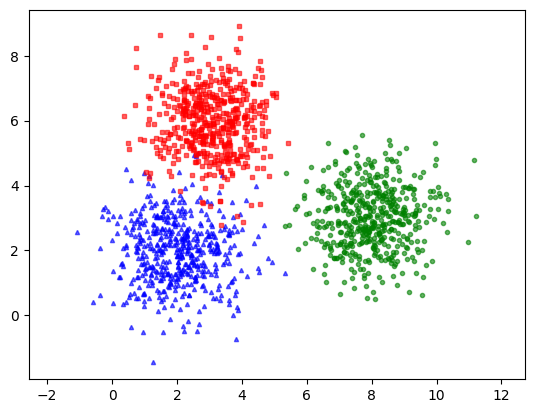

In [11]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 3, alpha = .6)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 3, alpha = .6)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 3, alpha = .6)
    
    plt.axis('equal')
    plt.plot()
    plt.show()

kmeans_display(X, original_label)

In [12]:
def kmeans_init_centers(X, k):
    return X[np.random.choice(X.shape[0], k, replace = False)]

def kmeans_asign_labels(X, centers):
    D = cdist(X, centers)
    #D.shape adu o day print D.shape thi no ko print vi goi ham nay thi no print cai thang return :v
    #print(D.shape) # phai them print moi duoc
    return np.argmin(D, axis = 1)

#kmeans_asign_labels(X, kmeans_init_centers(X, K))

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        Xk = X[labels == k, :]
        centers[k, :] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    return (set([tuple(a) for a in centers])
            == set([tuple(a) for a in new_centers]))

In [13]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_asign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1 # bruh in Python, ++it means nothing, must be it += x
    return (centers, labels, it)

In [14]:
(centers, labels, it) = kmeans(X, K)
print("centers are\n", centers[-1], "\n with ", it, " iterates\n")

centers are
 [[8.00466338 3.00161043]
 [2.01937119 1.97314206]
 [3.02932102 5.98393548]] 
 with  5  iterates



centers are:
 [[18.71543178 63.37574694]
 [42.27173507 39.21569301]
 [ 9.92383942 30.05287601]
 [51.53480158 89.86276513]] 
 and the number of interates is:  10


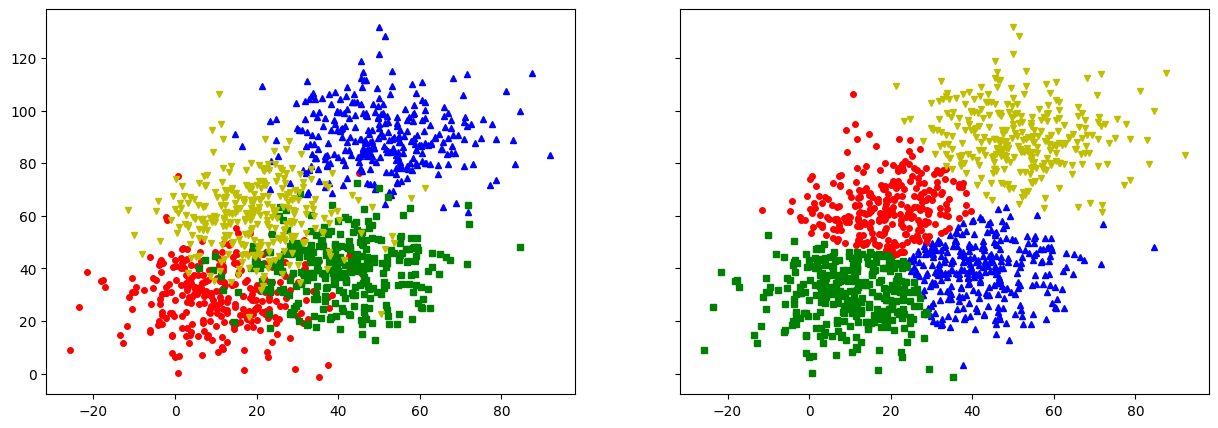

In [15]:
# implement again from the beginning

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

N = 300
K = 4
cov = [[150, 0], [0, 150]]
means = [[10, 30], [50, 90], [40, 40], [20, 60]]

X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X3 = np.random.multivariate_normal(means[3], cov, N)
tmp = [X0, X1, X2, X3]
cl = ['ro', 'b^', 'gs', 'yv'] # yv duoc ma ov ko duoc vi 'o' la cua marker roi :))
# no phai la color-marker, va marker thi co ^, v, s, o, d,... -> color phai tranh' nhung tu do ra
X = np.concatenate((X0, X1, X2, X3), axis = 0)

fig, ax = plt.subplots(ncols = 2, figsize = (15, 5), sharex = True, sharey = True)

for i in range(K):
    ax[0].plot(tmp[i][:, 0], tmp[i][:, 1], cl[i], markersize = 4)

# tips for naming is to first name the algo u are doing first
# because when u type "kmeans" it will suggest all the func related to that algo
def kmeans_rd_k_centers(X, K):
    return X[np.random.choice(X.shape[0], K, replace = False)]

def kmeans_relabel(X, centers):
    D = cdist(X, centers)
    return np.argmin(D, axis = 1)

def kmeans_recenter(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for i in range(K):
        Xk = X[labels == i, :]
        centers[i, :] = np.mean(Xk, axis = 0)
    return centers

def kmeans_isConverged(centers, new_centers):
    return (set([tuple(a) for a in centers])
            == set([tuple(a) for a in new_centers]))
    
def kmeans2(X, K):
    centers = [kmeans_rd_k_centers(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_relabel(X, centers[-1]))
        new_center = kmeans_recenter(X, labels[-1], K)
        if kmeans_isConverged(centers[-1], new_center):
            break
        it += 1
        centers.append(new_center)
    return (centers, labels, it)

(centers, labels, it) = kmeans2(X, K)
print("centers are:\n", centers[-1], "\n and the number of interates is: ", it)

for i in range(K):
    Xk = X[labels[-1] == i, :]
    ax[1].plot(Xk[:, 0], Xk[:, 1], cl[i], markersize = 4)

## Implement Kmeans Clustering using scikit-learn


centers found by sci-kit learn
 [[42.02828479 38.41043488]
 [51.75492226 92.13311881]
 [ 7.93881148 29.53930486]
 [19.54412987 62.07050853]]


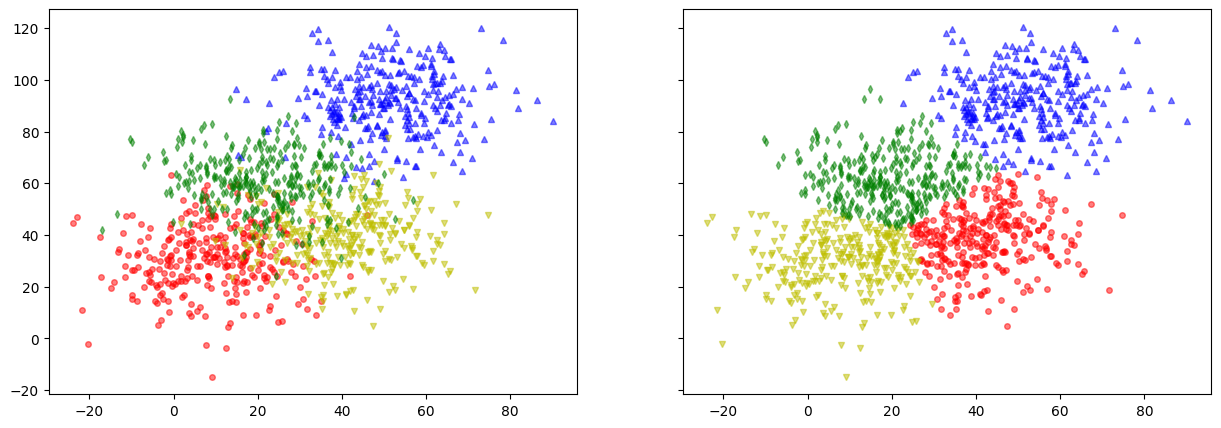

In [16]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

K = 4
N = 300
cov = [[150, 0], [0, 150]]
means = [[10, 30], [50, 90], [40, 40], [20, 60]]

X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X3 = np.random.multivariate_normal(means[3], cov, N)
X = np.concatenate((X0, X1, X2, X3), axis = 0)

kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(X)
print("centers found by sci-kit learn\n", kmeans.cluster_centers_)
pred_label = kmeans.predict(X)

tmp = [X0, X1, X2, X3]
cl = ['ro', 'b^', 'yv', 'gd']

fig, ax = plt.subplots(ncols = 2, figsize = (15, 5), sharex = True, sharey = True)

for i in range(K):
    ax[0].plot(tmp[i][:, 0], tmp[i][:, 1], cl[i], markersize = 4, alpha = .5)

for i in range(K):
    Xk = X[pred_label == i, :]
    ax[1].plot(Xk[:, 0], Xk[:, 1], cl[i], markersize = 4, alpha = .5)

In [17]:
lst = [1, 2, 3]
b = [3, 4, 5]
a = set()
# a.add(lst)  Can't because list is not hashable
a.add(tuple(lst))
a.add(tuple(b))
a
x = set([10, 4, 6]) # set(?) ? must be a iterable data type so that set can access and extract all elements in that
y = set((1, 2))
x
y

{1, 2}